## **MIMIC Data Cohort from MIMIC-IV-3.2 **
Data Downloaded February 8th , 2025

Phase 1 Data Extraction  
#replace this link with latest extract 
https://colab.research.google.com/drive/1IIYkR_CSGwakQJ5g47gtY1TnQIs91T02#scrollTo=71f2964d-361e-4a8a-b59f-429624b6e1ce

# Phase 2 Extracted Dataset Mounted  
Nth Attempt Feb 23, 24



In [51]:
# Define file path
file_path = "D:/MIMIC-IV-Data-Pipeline/processed_data/prediction_data_v4.1_cleaned.csv.gz"

# Check if the file exists
import os
print("File Exists:", os.path.exists(file_path))


File Exists: True


In [53]:
import pandas as pd

file_path = "D:/MIMIC-IV-Data-Pipeline/processed_data/prediction_data_v4.1_cleaned.csv.gz"

# Load dataset
df = pd.read_csv(file_path, compression="gzip", low_memory=False)

print("✅ Data Loaded! Shape:", df.shape)
print(df.head())  # Show first 5 rows


✅ Data Loaded! Shape: (555244, 43)
   subject_id   hadm_id  admission_type      admission_location  \
0    10000032  22595853          URGENT  TRANSFER FROM HOSPITAL   
1    10000032  22841357        EW EMER.          EMERGENCY ROOM   
2    10000032  25742920        EW EMER.          EMERGENCY ROOM   
3    10000032  29079034        EW EMER.          EMERGENCY ROOM   
4    10000068  25022803  EU OBSERVATION          EMERGENCY ROOM   

  discharge_location insurance marital_status   race  ed_time_spent  los_hosp  \
0               HOME  Medicaid        WIDOWED  WHITE          253.0  0.786111   
1               HOME  Medicaid        WIDOWED  WHITE          337.0  1.015278   
2            HOSPICE  Medicaid        WIDOWED  WHITE          286.0  1.754167   
3               HOME  Medicaid        WIDOWED  WHITE          486.0  2.222222   
4                NaN       NaN         SINGLE  WHITE          511.0  0.298611   

   ... wbc_count_missing  heart_rate_missing  systolic_bp_missing  \
0  ...

In [55]:
# Keep only palliative care patients
df = df[df["palliative_care_flag"] == 1]



In [57]:
print("🔍 Dataset Overview:")
print(df.info())  # Check column types and memory usage
print("\nMissing Values:\n", df.isnull().sum())  # Count missing values


🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 14407 entries, 71 to 555192
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_id                14407 non-null  int64  
 1   hadm_id                   14407 non-null  int64  
 2   admission_type            14407 non-null  object 
 3   admission_location        14407 non-null  object 
 4   discharge_location        14294 non-null  object 
 5   insurance                 14184 non-null  object 
 6   marital_status            13015 non-null  object 
 7   race                      14407 non-null  object 
 8   ed_time_spent             14407 non-null  float64
 9   los_hosp                  14358 non-null  float64
 10  gender                    14407 non-null  object 
 11  anchor_age                14407 non-null  int64  
 12  anchor_year               14407 non-null  int64  
 13  stay_id                   14407 non-null  ob

In [59]:
# prompt: rename los to icu _os

df = df.rename(columns={'los': 'icu_los'})


<class 'pandas.core.frame.DataFrame'>
Index: 14407 entries, 71 to 555192
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_id                14407 non-null  int64  
 1   hadm_id                   14407 non-null  int64  
 2   admission_type            14407 non-null  object 
 3   admission_location        14407 non-null  object 
 4   discharge_location        14294 non-null  object 
 5   insurance                 14184 non-null  object 
 6   marital_status            13015 non-null  object 
 7   race                      14407 non-null  object 
 8   ed_time_spent             14407 non-null  float64
 9   los_hosp                  14358 non-null  float64
 10  gender                    14407 non-null  object 
 11  anchor_age                14407 non-null  int64  
 12  anchor_year               14407 non-null  int64  
 13  stay_id                   14407 non-null  object 
 14  last_care

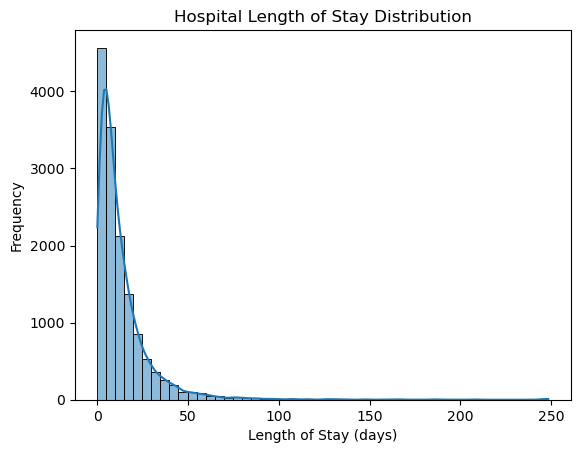

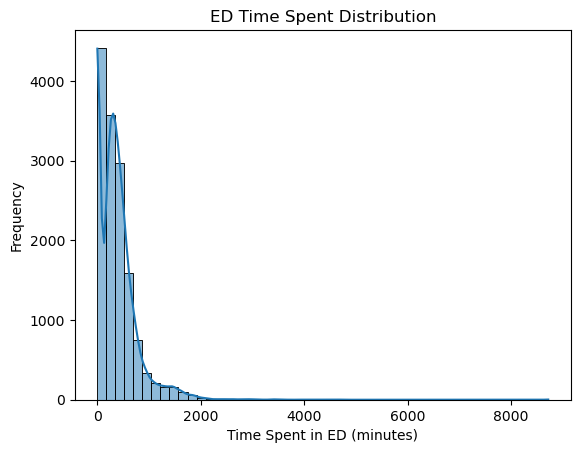

admission_type
EW EMER.                       6938
OBSERVATION ADMIT              4136
URGENT                         2433
DIRECT EMER.                    549
SURGICAL SAME DAY ADMISSION     142
ELECTIVE                         93
EU OBSERVATION                   86
DIRECT OBSERVATION               29
AMBULATORY OBSERVATION            1
Name: count, dtype: int64


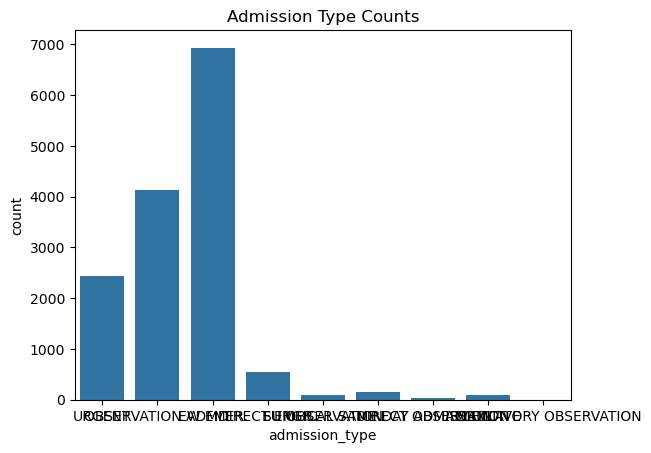

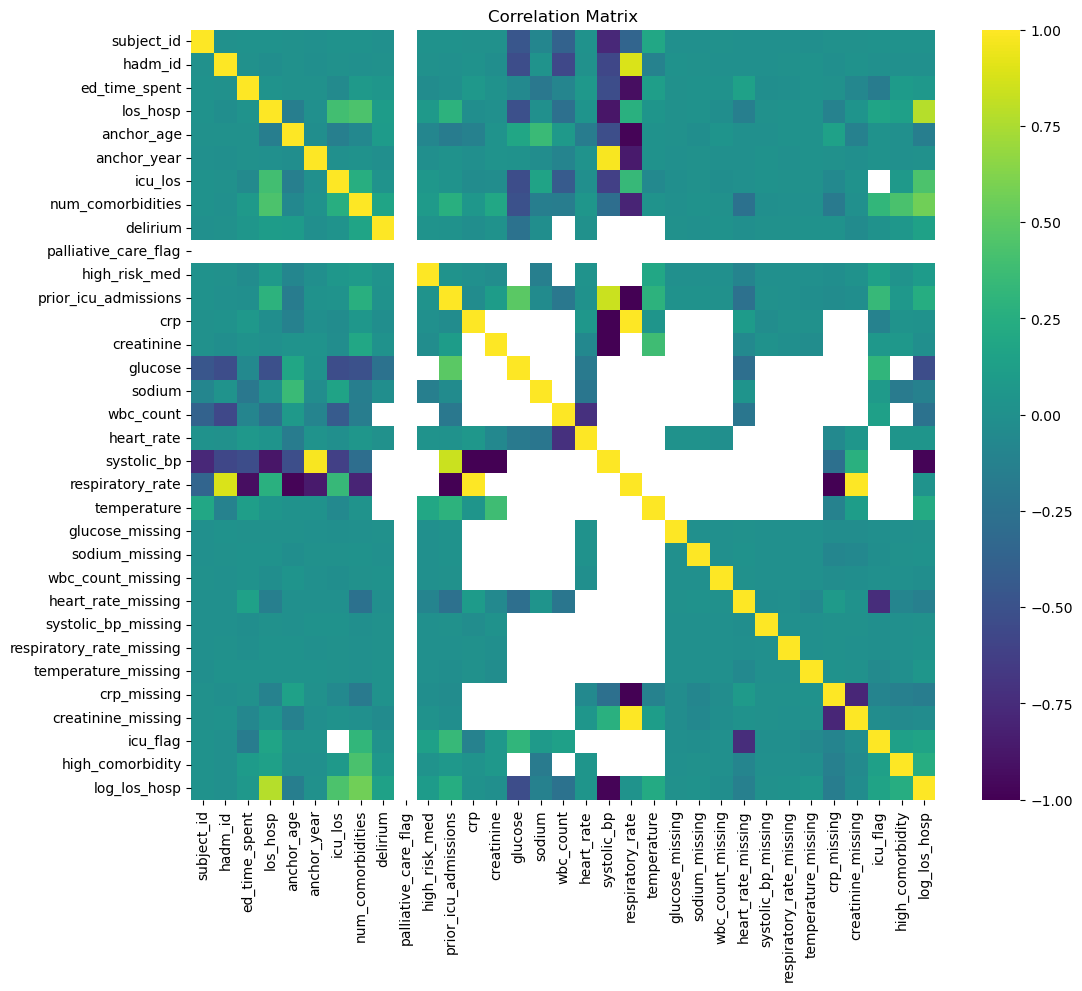

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
#data = pd.read_csv("D:/MIMIC-IV-Data-Pipeline/processed_data/delirium_prediction_data_v4.csv.gz", compression='gzip')
data = df

# Quick look at the data structure
print(data.info())
print(data.head())

# Summary statistics for continuous variables
print(data.describe())

# Check missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Missing values by column:\n", missing_values)

# Visualize distribution of key variables (e.g., los_hosp, ed_time_spent)
sns.histplot(data['los_hosp'], bins=50, kde=True)
plt.title('Hospital Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['ed_time_spent'].dropna(), bins=50, kde=True)
plt.title('ED Time Spent Distribution')
plt.xlabel('Time Spent in ED (minutes)')
plt.ylabel('Frequency')
plt.show()

# Frequency counts for categorical variables
print(data['admission_type'].value_counts())
sns.countplot(x='admission_type', data=data)
plt.title('Admission Type Counts')
plt.show()

# Correlation matrix for continuous variables
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


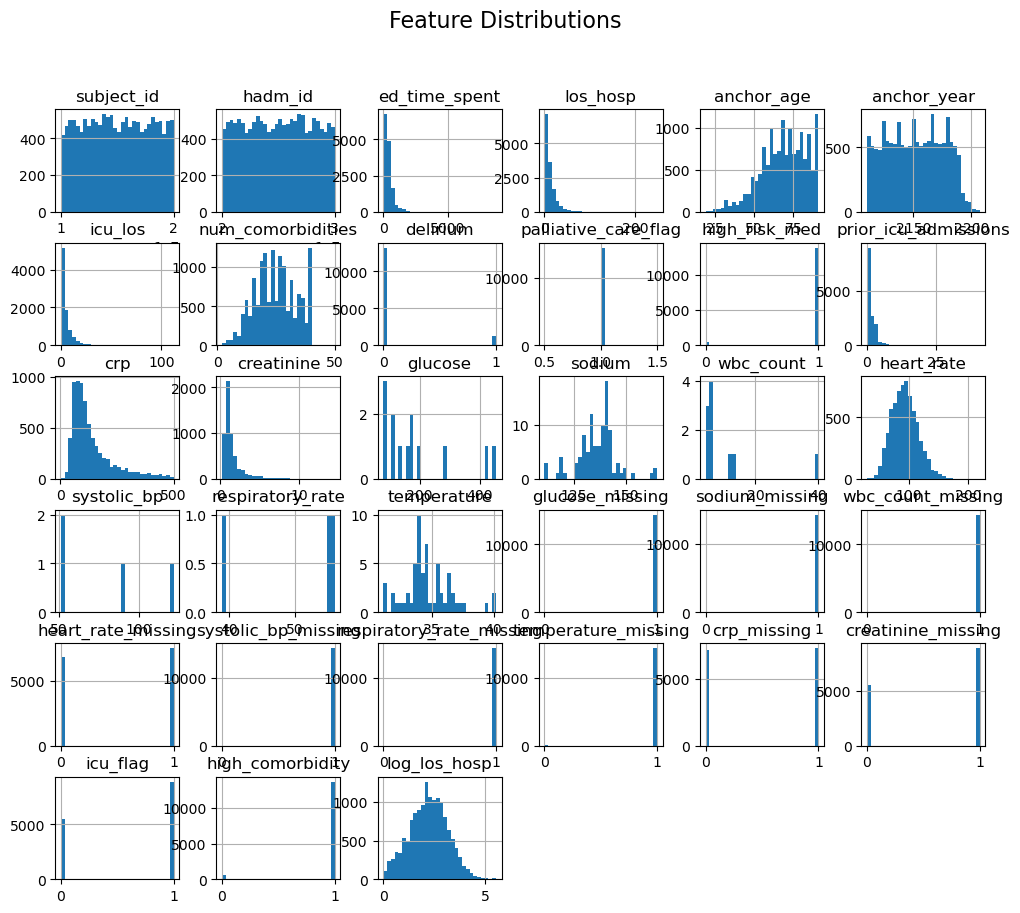

In [21]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Delirium Rate by Admission Type:
 admission_type
AMBULATORY OBSERVATION         0.000000
DIRECT EMER.                   0.096539
DIRECT OBSERVATION             0.034483
ELECTIVE                       0.043011
EU OBSERVATION                 0.011628
EW EMER.                       0.081147
OBSERVATION ADMIT              0.091876
SURGICAL SAME DAY ADMISSION    0.140845
URGENT                         0.080148
Name: delirium, dtype: float64
Delirium Rate by ICU Status:
 icu_flag
0    0.077049
1    0.089061
Name: delirium, dtype: float64


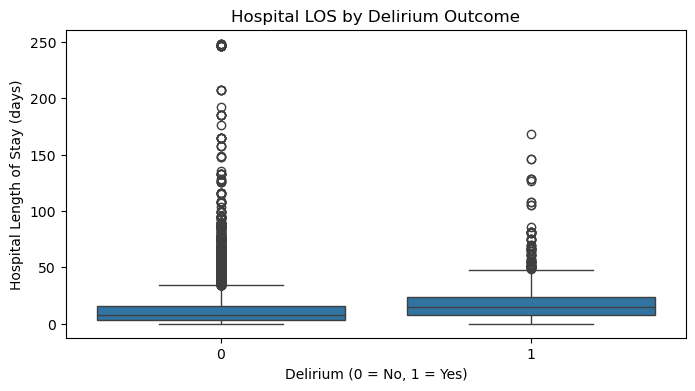

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load   final cleaned dataset
#data = pd.read_csv("D:/MIMIC-IV-Data-Pipeline/processed_data/delirium_prediction_data_v4_final_cleaned.csv.gz", compression='gzip')
data = df
# ---- Outcome Exploration ----
# Check delirium prevalence across admission types and ICU status
delirium_by_admtype = data.groupby('admission_type')['delirium'].mean()
print("Delirium Rate by Admission Type:\n", delirium_by_admtype)

delirium_by_icu = data.groupby('icu_flag')['delirium'].mean()
print("Delirium Rate by ICU Status:\n", delirium_by_icu)

# Visualize distribution of a continuous predictor by outcome
plt.figure(figsize=(8,4))
sns.boxplot(x='delirium', y='los_hosp', data=data)
plt.title("Hospital LOS by Delirium Outcome")
plt.xlabel("Delirium (0 = No, 1 = Yes)")
plt.ylabel("Hospital Length of Stay (days)")
plt.show()


In [65]:

# Define new target variable
y = df["delirium"]

# Drop non-relevant columns
X = df.drop(columns=["delirium", "palliative_care_flag"])

In [67]:
print("🔍 Non-Numeric Columns in X_train:")
print(X_train.select_dtypes(include=["object"]).columns)


🔍 Non-Numeric Columns in X_train:
Index([], dtype='object')


In [69]:
# Identify categorical columns
categorical_cols = ["admission_type", "admission_location", "discharge_location", 
                    "insurance", "race", "gender", "marital_status", "last_careunit", "stay_id","diagnosis_list"]



In [71]:
from sklearn.model_selection import train_test_split
 
# Split train-test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Convert categorical features into numeric using one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

In [73]:
print("✅ X_train Shape:", X_train.shape)
print("✅ y_train Shape:", y_train.shape)


✅ X_train Shape: (11525, 7248)
✅ y_train Shape: (11525,)


In [77]:
# Fill missing values in numerical columns with median
X_train = X_train.fillna(X_train.median())

# Fill missing values in categorical (encoded) columns with 0
X_train = X_train.fillna(0)

print("✅ Missing values handled before SMOTE.")


✅ Missing values handled before SMOTE.


In [79]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Reapply SMOTE after fixing missing values
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied! New class distribution:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))


C:\Users\truly\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\truly\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\truly\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\truly\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\truly\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

✅ SMOTE applied! New class distribution:
delirium
0    0.5
1    0.5
Name: proportion, dtype: float64


In [83]:
# Drop identifiers before encoding
X_train = X_train.drop(columns=["subject_id", "hadm_id", "stay_id"], errors="ignore")
X_test = X_test.drop(columns=["subject_id", "hadm_id", "stay_id"], errors="ignore")


In [85]:
# Ensure train and test have the same one-hot encoded columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test with X_train
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print("✅ Feature names aligned between train and test sets!")


✅ Feature names aligned between train and test sets!


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42)
log_model.fit(X_train_encoded, y_train_resampled)

# Make Predictions
y_pred_log = log_model.predict(X_test_encoded)

# Evaluate Model
print("✅ Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_log))


ValueError: Found input variables with inconsistent numbers of samples: [11525, 21102]

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression with class balancing
log_model = LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate Model
print("✅ Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_log))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- stay_id_30007228.0
- stay_id_30009597.0
- stay_id_30023537.0
- stay_id_30025200.0
- stay_id_30026279.0
- ...
Feature names seen at fit time, yet now missing:
- admission_location_INTERNAL TRANSFER TO OR FROM PSYCH
- admission_type_DIRECT EMER.
- insurance_No charge
- last_careunit_Surgery/Trauma
- race_HISPANIC/LATINO - COLUMBIAN
- ...


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=200, class_weight="balanced_subsample", random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
print("✅ Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))


In [ ]:
import xgboost as xgb

# Initialize XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
print("✅ XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"✅ {name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, AUC: {roc_auc_score(y_test, y_pred):.4f}")


In [15]:
# ---- Missing Data Indicator is already created for lab values ----

# ---- Data Partitioning: Example using StratifiedKFold ----
# Ensure splitting is done on a patient level if necessary (here we assume unique subjects)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(data, data['delirium']):
    train, test = data.iloc[train_index], data.iloc[test_index]
    print("Train delirium rate:", train['delirium'].mean(), "Test delirium rate:", test['delirium'].mean())

Train delirium rate: 0.019187518995035964 Test delirium rate: 0.0191897270574251
Train delirium rate: 0.019187518995035964 Test delirium rate: 0.0191897270574251
Train delirium rate: 0.019187518995035964 Test delirium rate: 0.0191897270574251
Train delirium rate: 0.019187518995035964 Test delirium rate: 0.0191897270574251
Train delirium rate: 0.0191897270574251 Test delirium rate: 0.01918089474821699


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve, auc

# Define your feature set and target
features = ['ed_time_spent', 'los_hosp', 'anchor_age', 'num_comorbidities', 
            'high_risk_med', 'icu_flag', 'log_los_hosp', 'high_comorbidity']
target = 'delirium'

X = df[features]
y = df[target]

# Create a pipeline that first imputes missing values, then scales the data, then fits LogisticRegression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # impute NaNs with the median of each feature
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Define hyperparameter grid for tuning
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear']  # liblinear supports l1 penalty
}

# Stratified KFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate overall performance
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X)[:, 1]
auc_score = roc_auc_score(y, y_pred_prob)
print("Overall ROC AUC:", auc_score)

# Precision-Recall AUC
precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Detailed classification report using a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)
print(classification_report(y, y_pred))



Best hyperparameters: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Overall ROC AUC: 0.8856535479096046
Precision-Recall AUC: 0.13883727587376213
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    544590
           1       0.07      0.84      0.13     10654

    accuracy                           0.78    555244
   macro avg       0.53      0.81      0.50    555244
weighted avg       0.98      0.78      0.86    555244



In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve, auc
import pandas as pd
import numpy as np

# Load your cleaned dataset 

# Define features and target
features = ['ed_time_spent', 'los_hosp', 'anchor_age', 'num_comorbidities', 
            'high_risk_med', 'icu_flag', 'log_los_hosp', 'high_comorbidity']
target = 'delirium'

X = df[features]
y = df[target]

# Identify feature groups
continuous_features = ['ed_time_spent', 'los_hosp', 'anchor_age', 'num_comorbidities', 'log_los_hosp']
binary_features = ['high_risk_med', 'icu_flag', 'high_comorbidity']

# Create pipelines for each group
continuous_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
    # Binary features may not require scaling.
])

# Create a column transformer to apply different imputations
preprocessor = ColumnTransformer(transformers=[
    ('cont', continuous_pipeline, continuous_features),
    ('bin', binary_pipeline, binary_features)
])

# Create full pipeline with preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Define hyperparameter grid for logistic regression
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear']  # liblinear supports l1 penalty
}

# Set up stratified KFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate overall performance
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X)[:, 1]
auc_score = roc_auc_score(y, y_pred_prob)
print("Overall ROC AUC:", auc_score)

# Precision-Recall AUC evaluation
precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Classification report (using a threshold of 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)
print(classification_report(y, y_pred))


Best hyperparameters: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Overall ROC AUC: 0.8856762615591969
Precision-Recall AUC: 0.1388492011429312
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    544590
           1       0.07      0.84      0.13     10654

    accuracy                           0.78    555244
   macro avg       0.53      0.81      0.50    555244
weighted avg       0.98      0.78      0.86    555244



In [18]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, classification_report
import xgboost as xgb   # ran !pip install xgboost first

# Load the cleaned dataset
 

# Define features and target
features = ['ed_time_spent', 'los_hosp', 'anchor_age', 'num_comorbidities', 
            'high_risk_med', 'icu_flag', 'log_los_hosp', 'high_comorbidity']
target = 'delirium'

X = df[features]
y = df[target]

# Define feature groups for custom imputation:
continuous_features = ['ed_time_spent', 'los_hosp', 'anchor_age', 'num_comorbidities', 'log_los_hosp']
binary_features = ['high_risk_med', 'icu_flag', 'high_comorbidity']

# Pipelines for each group
continuous_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

preprocessor = ColumnTransformer(transformers=[
    ('cont', continuous_pipeline, continuous_features),
    ('bin', binary_pipeline, binary_features)
])

# Build a pipeline with XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Hyperparameter grid for XGBoost
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0],
    'clf__scale_pos_weight': [round((len(y)-y.sum())/y.sum())]  # to account for imbalance
}

# Set up stratified KFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate overall performance
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X)[:, 1]
auc_score = roc_auc_score(y, y_pred_prob)
print("Overall ROC AUC:", auc_score)

# Evaluate Precision-Recall AUC
precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Classification report using a default threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)
print(classification_report(y, y_pred))


C:\Users\truly\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 200, 'clf__scale_pos_weight': 51, 'clf__subsample': 0.8}
Overall ROC AUC: 0.8959678552100097
Precision-Recall AUC: 0.14873501922665033
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    544590
           1       0.07      0.87      0.13     10654

    accuracy                           0.77    555244
   macro avg       0.53      0.82      0.50    555244
weighted avg       0.98      0.77      0.85    555244

